In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_SCS_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,59960,59960,59920,59960,34010
1,2019-03-04,59960,60080,58980,59960,8580
2,2019-03-05,58720,60010,58720,59960,35720
3,2019-03-06,59960,60130,59960,59960,9290
4,2019-03-07,59960,60400,59960,60330,19290
...,...,...,...,...,...,...
1248,2024-02-23,75000,75400,73600,73800,91600
1249,2024-02-26,74000,75500,73800,75400,95900
1250,2024-02-27,75400,76000,74000,74700,39400
1251,2024-02-28,74500,75700,74500,75500,63500


In [3]:
#3. Partition the data into necessary segments
data_model = data[['close']]
split = int(len(data)*0.9)
train = data_model[:split]
test = data_model[split:]

In [4]:
#4. Using auto ARIMA to find the most suitable p, d, q and fit with model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18614.578, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18615.701, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18615.662, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18612.604, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18616.642, Time=0.31 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.535 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
#5. Check the p-value to see if it is statistically significant
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1127
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9305.302
Date:                Wed, 29 May 2024   AIC                          18612.604
Time:                        03:24:22   BIC                          18617.631
Sample:                             0   HQIC                         18614.504
                               - 1127                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.814e+05   2.12e+04     41.583      0.000     8.4e+05    9.23e+05
Ljung-Box (L1) (Q):                   1.57   Jarque-Bera (JB):               824.77
Prob(Q):                              0.21   Pr

In [6]:
#6. Predict on the test data
predictions = model.predict(n_periods=len(test)+90)
predict_test = predictions[:-90]

In [7]:
#7. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(test, predict_test))
mape = mean_absolute_percentage_error(test, predict_test) * 100
msle = mean_squared_log_error(test, predict_test)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 3380.722217853119
MAPE: 3.310242931151805 %
MSLE: 0.002454286801542852


In [8]:
#8. Predict close prices for the next 30, 60, 90 days
next_30_days = predictions[-90:-60]
next_60_days = predictions[-90:-30]
next_90_days = predictions[-90:]

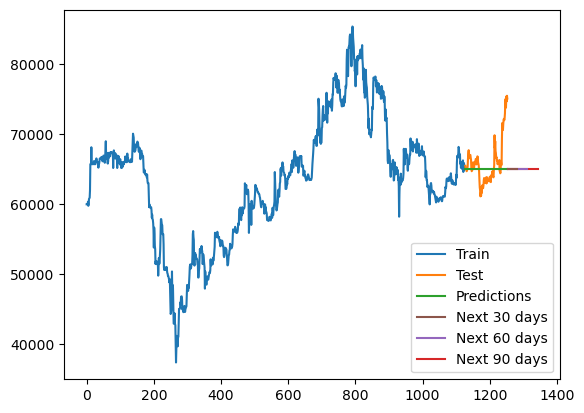

In [9]:
#9. Draw the plot
line1, = plt.plot(train.index, train["close"], label="Train")
line2, = plt.plot(test.index, test['close'], label="Test")
line3, = plt.plot(test.index, predict_test, label="Predictions")
line4, = plt.plot(next_90_days.index, next_90_days, label="Next 90 days")
line5, = plt.plot(next_60_days.index, next_60_days, label="Next 60 days")
line6, = plt.plot(next_30_days.index, next_30_days, label="Next 30 days")
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\ARIMA_SCS_91.png")
plt.show()
